<a href="https://colab.research.google.com/github/VasquezSRE/machinelearning-gtc/blob/main/extraction/Feature%20Selection/SVC_Seleccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import division
import sys; sys.path.append('./Utils')
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import pandas as pd
import math
from numpy import random
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_confusion_matrix
import sys; sys.path.append('./')
from utilssln import Utils

In [ ]:
ut = Utils2()

In [ ]:
dataset_rfe = './data/CTGsmtRFE.csv'
X, Y = ut.get_matrixes(dataset_rfe)

In [ ]:
def train_svm(kernel, C, gamma):
    Folds = 4
    random.seed(19680801)
    EficienciaTrain = []
    EficienciaVal = []
    skf = StratifiedKFold(n_splits=Folds)
    porc_vectores = []
    f1 = []
    gmean = []
    models = []
    for train, test in skf.split(X, Y):
        Xtrain, Ytrain, Xtest, Ytest = ut.get_training_test(X, Y, train, test)
        #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
        model = SVC(C=C,kernel=kernel, gamma=gamma, probability=True)
        model.fit(Xtrain, Ytrain)
        models.append(model)
        #Validación
        f1_score_current, gmean_current, eficiencia_train_current, eficiencia_test_current = ut.get_metrics(model=model, X_train=Xtrain, X_test=Xtest, y_train=Ytrain, Ytest=Ytest)
        gmean.append(gmean_current)
        f1.append(f1_score_current)
        EficienciaTrain.append(eficiencia_train_current)
        EficienciaVal.append(eficiencia_test_current)
    
    f1_m = np.mean(f1)
    f1_ic = np.std(f1)
    gmean = np.mean(gmean)
    gmean_ic = np.std(gmean)
    efi_train = np.mean(EficienciaTrain)
    efi_train_ic = np.std(EficienciaTrain)
    efi_test = np.mean(EficienciaVal)
    efi_test_ic = np.std(EficienciaVal)
        
    print(f"Finalizado: {kernel} C: {C} gamma: {gamma}")
    
    return f1_m, f1_ic, gmean, gmean_ic, efi_train, efi_train_ic, efi_test, efi_test_ic

In [ ]:
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Kernel' : pd.Series(['lineal','lineal','lineal','lineal','lineal','lineal','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf']),
    'C' : pd.Series([0.001,0.01,0.1,1,10,100,0.001,0.001,0.001,0.01,0.01,0.01,0.1,0.1,0.1,1,1,1,10,10,10,100,100,100]),
    'gamma' : pd.Series([0,0,0,0,0,0,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1])})

f1 = []
stdf1 = []
gmean =[]
stdgmean = []
efitrain = []
eftrainstd = []
efitest = []
efiteststd = []
for e, i, j in zip(df_types['Kernel'], df_types['C'], df_types['gamma']):
    if(e == 'lineal'):
        f1_m, f1_ic, gmean_, gmean_ic, efi_train_, efi_train_ic, efi_test, efi_test_ic = train_svm("linear", i, "auto")
    else:
        f1_m, f1_ic, gmean_, gmean_ic, efi_train_, efi_train_ic, efi_test, efi_test_ic = train_svm(e, i, j)
    f1.append(f1_m)
    stdf1.append(f1_ic)
    gmean.append(gmean_)
    stdgmean.append(gmean_ic)
    efitrain.append(efi_train_)
    eftrainstd.append(efi_train_ic)
    efitest.append(efi_test)
    efiteststd.append(efi_train_ic)
    
df_types.set_index(['Kernel','C','gamma'], inplace=True)
df_types["f1"] = f1
df_types["Intervalo de confianza f1"] = stdf1
df_types["G-mean"] = gmean
df_types["Intervalo de confianza G-mean"] = stdgmean
df_types["Eficiencia train"] = efitrain
df_types["Eficiencia train IC"] = eftrainstd
df_types["Eficiencia test"] = efitest
df_types["Eficiencia test IC"] = efiteststd

Finalizado: linear C: 0.001 gamma: auto
Finalizado: linear C: 0.01 gamma: auto
Finalizado: linear C: 0.1 gamma: auto
Finalizado: linear C: 1.0 gamma: auto
Finalizado: linear C: 10.0 gamma: auto
Finalizado: linear C: 100.0 gamma: auto
Finalizado: rbf C: 0.001 gamma: 0.01
Finalizado: rbf C: 0.001 gamma: 0.1
Finalizado: rbf C: 0.001 gamma: 1.0
Finalizado: rbf C: 0.01 gamma: 0.01
Finalizado: rbf C: 0.01 gamma: 0.1
Finalizado: rbf C: 0.01 gamma: 1.0
Finalizado: rbf C: 0.1 gamma: 0.01
Finalizado: rbf C: 0.1 gamma: 0.1
Finalizado: rbf C: 0.1 gamma: 1.0
Finalizado: rbf C: 1.0 gamma: 0.01
Finalizado: rbf C: 1.0 gamma: 0.1
Finalizado: rbf C: 1.0 gamma: 1.0
Finalizado: rbf C: 10.0 gamma: 0.01
Finalizado: rbf C: 10.0 gamma: 0.1
Finalizado: rbf C: 10.0 gamma: 1.0
Finalizado: rbf C: 100.0 gamma: 0.01
Finalizado: rbf C: 100.0 gamma: 0.1
Finalizado: rbf C: 100.0 gamma: 1.0


In [ ]:
df_types

f1  Intervalo de confianza f1    G-mean  \
Kernel C       gamma                                                  
lineal 0.001   0.00   0.621711                   0.113375  0.727090   
       0.010   0.00   0.788946                   0.034569  0.838899   
       0.100   0.00   0.828701                   0.036033  0.870034   
       1.000   0.00   0.850014                   0.038714  0.886458   
       10.000  0.00   0.867051                   0.025346  0.899361   
       100.000 0.00   0.866272                   0.029174  0.898739   
rbf    0.001   0.01   0.314013                   0.256025  0.557098   
               0.10   0.314160                   0.256280  0.557408   
               1.00   0.312329                   0.253108  0.556011   
       0.010   0.01   0.314013                   0.256025  0.557098   
               0.10   0.721062                   0.029601  0.787178   
               1.00   0.802182                   0.016637  0.849287   
       0.100   0.01   0.722012                   0.033104  0.788259   
               0.10   0.810175                   0.036628  0.855560   
               1.00   0.845283                   0.033217  0.882484   
       1.000   0.01   0.810698                   0.036032  0.856025   
               0.10   0.841743                   0.042570  0.880151   
               1.00   0.913053                   0.024869  0.935079   
       10.000  0.01   0.831261                   0.041607  0.872012   
               0.10   0.881796                   0.031610  0.910816   
               1.00   0.931459                   0.025932  0.949075   
       100.000 0.01   0.866318                   0.033051  0.898884   
               0.10   0.915448                   0.023838  0.936607   
               1.00   0.939385                   0.034785  0.955290   

                      Intervalo de confianza G-mean  Eficiencia train  \
Kernel C       gamma                                                    
lineal 0.001   0.00                             0.0          0.644181   
       0.010   0.00                             0.0          0.808057   
       0.100   0.00                             0.0          0.850420   
       1.000   0.00                             0.0          0.874186   
       10.000  0.00                             0.0          0.890165   
       100.000 0.00                             0.0          0.894663   
rbf    0.001   0.01                             0.0          0.432514   
               0.10                             0.0          0.434663   
               1.00                             0.0          0.435872   
       0.010   0.01                             0.0          0.432514   
               0.10                             0.0          0.730111   
               1.00                             0.0          0.818530   
       0.100   0.01                             0.0          0.732461   
               0.10                             0.0          0.831958   
               1.00                             0.0          0.876066   
       1.000   0.01                             0.0          0.831622   
               0.10                             0.0          0.868480   
               1.00                             0.0          0.941054   
       10.000  0.01                             0.0          0.856462   
               0.10                             0.0          0.911112   
               1.00                             0.0          0.973213   
       100.000 0.01                             0.0          0.891507   
               0.10                             0.0          0.945955   
               1.00                             0.0          0.989527   

                      Eficiencia train IC  Eficiencia test  Eficiencia test IC  
Kernel C       gamma                                                            
lineal 0.001   0.00              0.053266         0.644086            0.053266  
       0.010   0.00              0.0061

In [ ]:
model = SVC(C=100,kernel='rbf', gamma=1, probability=True)
X_train, X_test, y_train, y_test = ut.get_train_test(dataset_rfe)
model.fit(X_train,y_train)

SVC(C=100, gamma=1, probability=True)

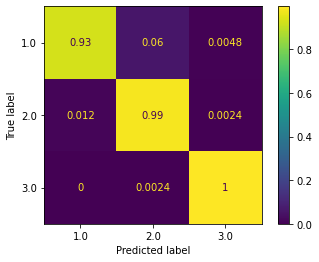

In [ ]:
plot_confusion_matrix(model,X=X_test, y_true=y_test,normalize='true')